In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [8]:
data = pd.read_excel('FraudDetection.xlsx')
data.head()

,Transaction_ID,Card Tenure_months,WebsiteRegion,Trans_value,Seller_Category,Items_transaction,Shipping_Address,Purchase_Category,Othercard_owner,Seller_way,LastTransaction,Lastflagedvalue,LastMonthsTrans_Freq,Countryissuedcard,Fraud_Detected
0,1,25,US,256.41,Store + online,10,US,online services,Dependent,Yes,0,0,40,United-States,No
1,2,38,US,409.54,Online only,8,International,Accessories,Husband,Yes,0,0,50,United-States,No
2,3,28,EU,293.09,Online only,5,International,Electornics,Husband,Yes,0,0,40,United-States,Yes
3,4,44,US,444.07,Online only,7,International,online services,Husband,Yes,7688,0,40,United-States,Yes
4,5,18,EU,183.11,Online only,7,US,Food,Dependent,No,0,0,30,United-States,No


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
Transaction_ID          16281 non-null int64
Card Tenure_months      16281 non-null int64
WebsiteRegion           16281 non-null object
Trans_value             16281 non-null float64
Seller_Category         16281 non-null object
Items_transaction       16281 non-null int64
Shipping_Address        16281 non-null object
Purchase_Category       16281 non-null object
Othercard_owner         16281 non-null object
Seller_way              16281 non-null object
LastTransaction         16281 non-null int64
Lastflagedvalue         16281 non-null int64
LastMonthsTrans_Freq    16281 non-null int64
Countryissuedcard       16281 non-null object
Fraud_Detected          16281 non-null object
dtypes: float64(1), int64(6), object(8)
memory usage: 1.9+ MB


In [153]:
#target visual data
##list all character columns
char_list = [name for name in data.columns if data[name].dtype=='object']
num_list_withID = [name for name in data.columns if data[name].dtype!='object']
num_list = num_list_withID[:]

new_col=char_list+num_list
df_temp = data[new_col]
df=df_temp.drop_duplicates('Transaction_ID',keep='first')
target = df['Fraud_Detected']
df=df.drop('Transaction_ID',axis=1)

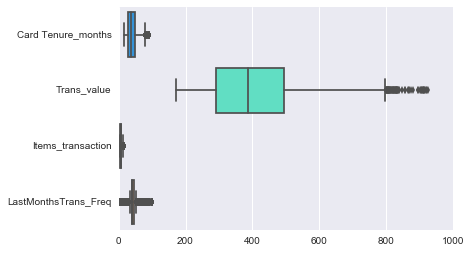

In [154]:
sns.boxplot(data=df.drop(['LastTransaction','Lastflagedvalue'],axis=1),palette='rainbow',orient='h')

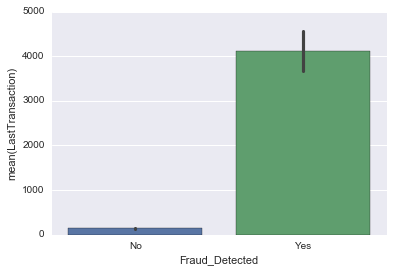

In [155]:
sns.barplot(y='LastTransaction',data=df,x='Fraud_Detected')

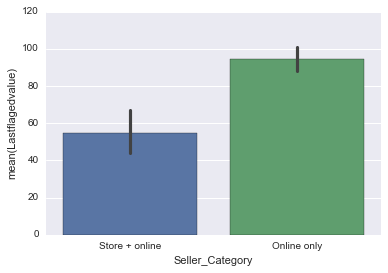

In [156]:
sns.barplot(y='Lastflagedvalue',data=df,x='Seller_Category')

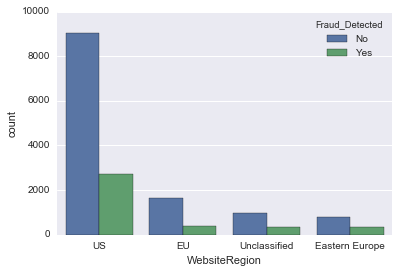

In [157]:
sns.countplot(data=df,x='WebsiteRegion',hue='Fraud_Detected')

In [158]:
pd.crosstab(df['WebsiteRegion'], df['Fraud_Detected'],margins=True)

Fraud_Detected,No,Yes,All
WebsiteRegion,,,
EU,1625,384,2009
Eastern Europe,793,369,1162
US,9049,2740,11789
Unclassified,968,353,1321
All,12435,3846,16281


In [159]:
from scipy.stats import chi2_contingency
def chisq_df_cols(df,col1,col2):
    groupsize=df.groupby([col1,col2]).size()
    ctsum=groupsize.unstack(col1)
    return (chi2_contingency(ctsum.fillna(0)))
chisq_df_cols(df,'WebsiteRegion', target)

(73.215737407927008,
 8.7389974777126689e-16,
 3,
 array([[ 1534.42141146,   887.50506726,  9004.12843191,  1008.94508937],
        [  474.57858854,   274.49493274,  2784.87156809,   312.05491063]]))

In [160]:
objdf = data[char_list]
objdf2=objdf.drop('Fraud_Detected',axis=1)
#objdf2.head()
for cat in objdf2.columns:
    st=chisq_df_cols(objdf2, cat, target)
    print('chisq for '+cat+' is: ', st[0] )

chisq for WebsiteRegion is:  73.2157374079
chisq for Seller_Category is:  343.930588314
chisq for Shipping_Address is:  3272.59336656
chisq for Purchase_Category is:  1798.96504112
chisq for Othercard_owner is:  3369.57080193
chisq for Seller_way is:  729.929867
chisq for Countryissuedcard is:  13.2105450701


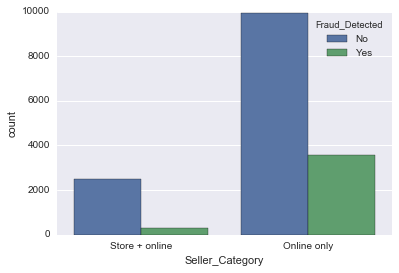

In [161]:
sns.countplot(data=df,x='Seller_Category',hue='Fraud_Detected')

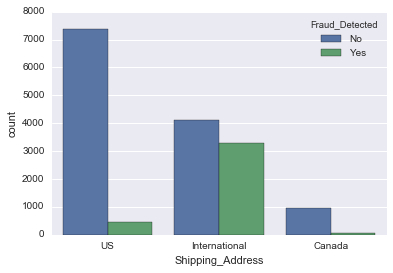

In [162]:
sns.countplot(data=df,x='Shipping_Address',hue='Fraud_Detected')
#international has high fraud detected

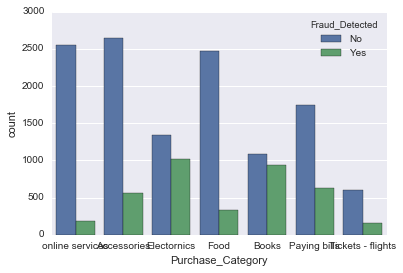

In [163]:
sns.countplot(data=df,x='Purchase_Category',hue='Fraud_Detected')
#electricaland books has high fraud detected

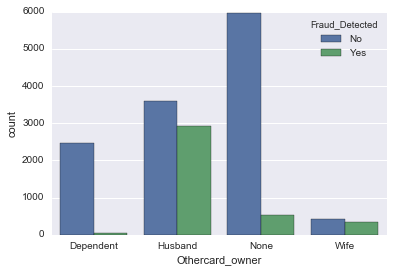

In [164]:
sns.countplot(data=df,x='Othercard_owner',hue='Fraud_Detected')
#husband and wife have high fraud detected

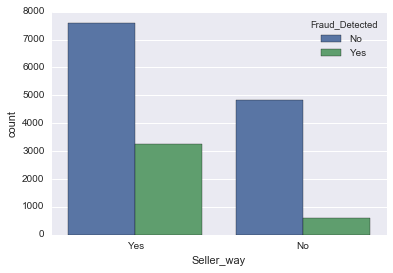

In [165]:
sns.countplot(data=df,x='Seller_way',hue='Fraud_Detected')

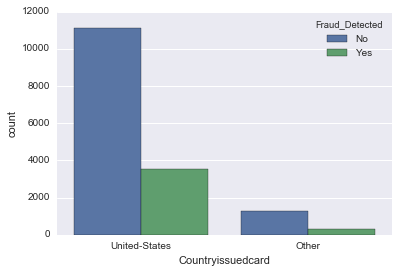

In [166]:
sns.countplot(data=df,x='Countryissuedcard',hue='Fraud_Detected')

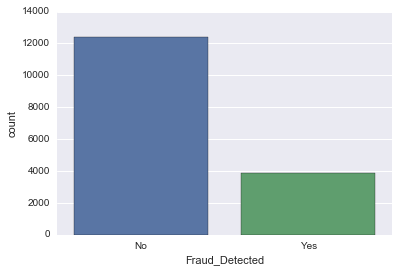

In [167]:
sns.countplot(data=df,x='Fraud_Detected')

In [168]:
num_list.append('Fraud_Detected')
df_num = df[num_list]
df_num.head()

KeyError: "['Transaction_ID'] not in index"

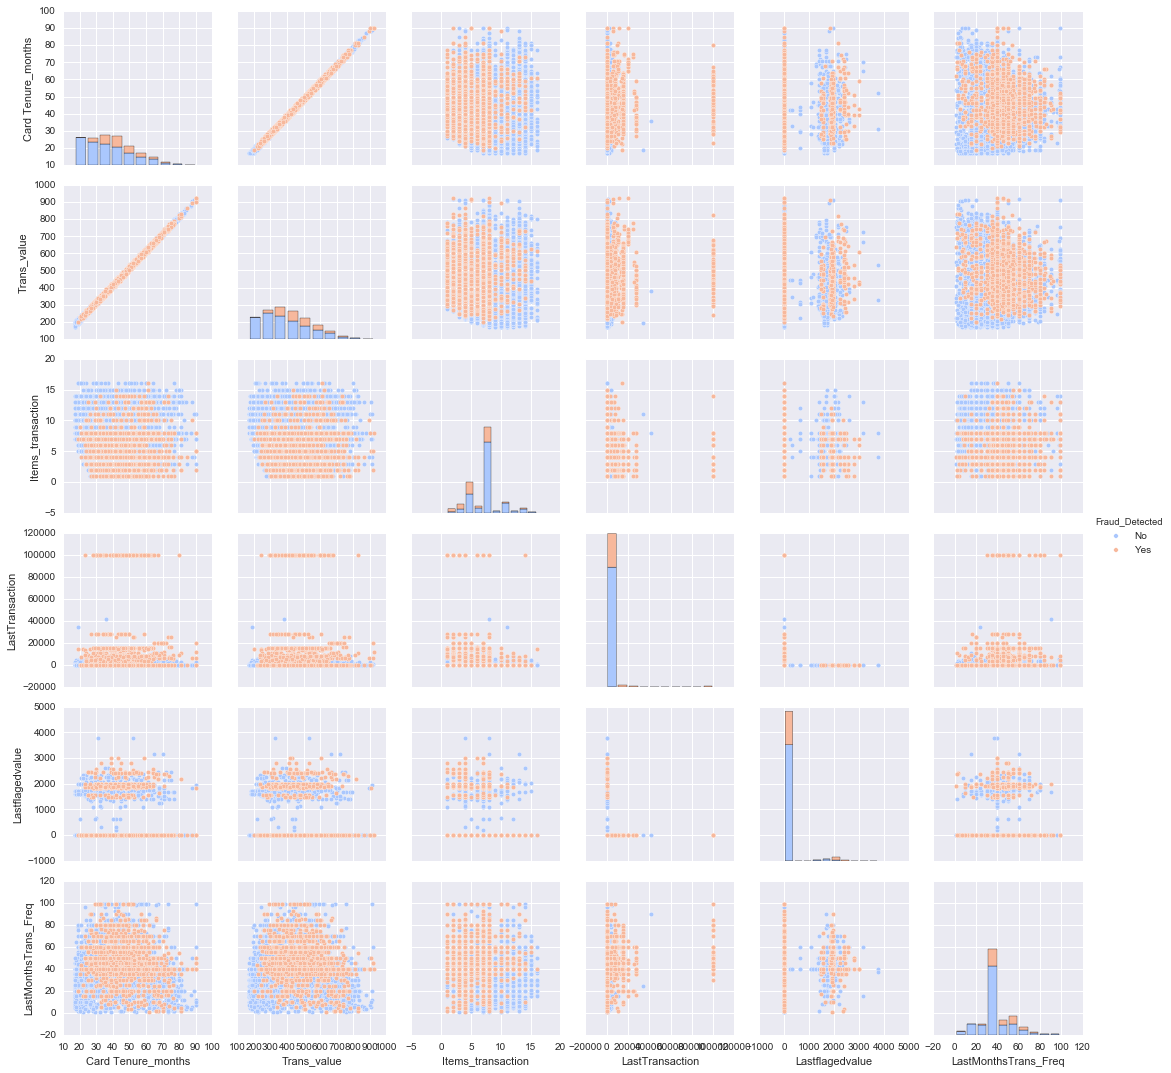

In [169]:
sns.pairplot(df_num[:-1],hue='Fraud_Detected',palette='coolwarm')
#Car Tenture_months and Trans_Value has stong linar relationship
#Car Tenture_months and Trans_Value might have some relation with Items_transaction

In [170]:
#numtype=['int16','int32','int64','float16','float32','float64']
#numdf = df.select_dtypes(include=numtype)
#numpredictor = list(numdf.columns)

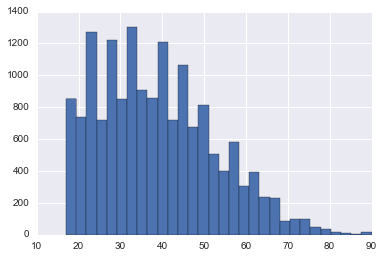

In [171]:
df['Card Tenure_months'].hist(bins=30)

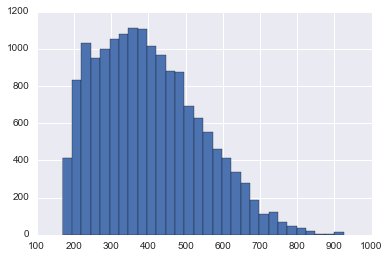

In [172]:
df['Trans_value'].hist(bins=30)

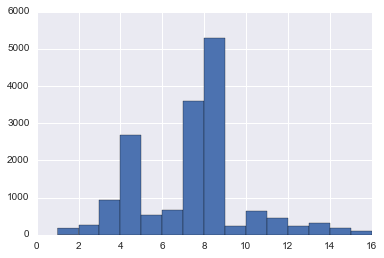

In [173]:
df['Items_transaction'].hist(bins=15)

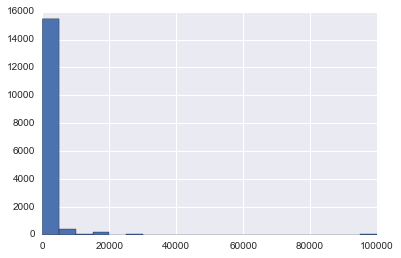

In [174]:
df['LastTransaction'].hist(bins=20)

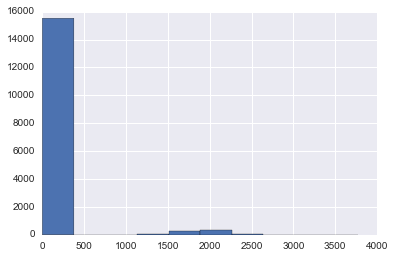

In [175]:
df['Lastflagedvalue'].hist(bins=10)

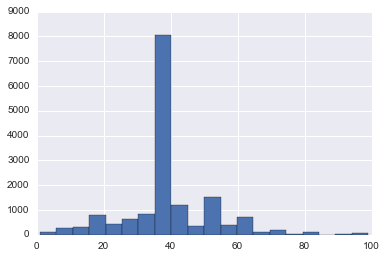

In [176]:
df['LastMonthsTrans_Freq'].hist(bins=20)

In [177]:
df.head()

,WebsiteRegion,Seller_Category,Shipping_Address,Purchase_Category,Othercard_owner,Seller_way,Countryissuedcard,Fraud_Detected,Card Tenure_months,Trans_value,Items_transaction,LastTransaction,Lastflagedvalue,LastMonthsTrans_Freq
0,US,Store + online,US,online services,Dependent,Yes,United-States,No,25,256.41,10,0,0,40
1,US,Online only,International,Accessories,Husband,Yes,United-States,No,38,409.54,8,0,0,50
2,EU,Online only,International,Electornics,Husband,Yes,United-States,Yes,28,293.09,5,0,0,40
3,US,Online only,International,online services,Husband,Yes,United-States,Yes,44,444.07,7,7688,0,40
4,EU,Online only,US,Food,Dependent,No,United-States,No,18,183.11,7,0,0,30


In [178]:
[print([data[item].value_counts()]) for item in char_list]

[US                11789
EU                 2009
Unclassified       1321
Eastern Europe     1162
Name: WebsiteRegion, dtype: int64]
[Online only       13479
Store + online     2802
Name: Seller_Category, dtype: int64]
[US               7834
International    7417
Canada           1030
Name: Shipping_Address, dtype: int64]
[Accessories          3211
Food                 2813
online services      2741
Paying bills         2372
Electornics          2366
Books                2020
Tickets - flights     758
Name: Purchase_Category, dtype: int64]
[Husband      6523
None         6482
Dependent    2513
Wife          763
Name: Othercard_owner, dtype: int64]
[Yes    10860
No      5421
Name: Seller_way, dtype: int64]
[United-States    14662
Other             1619
Name: Countryissuedcard, dtype: int64]
[No     12435
Yes     3846
Name: Fraud_Detected, dtype: int64]


[None, None, None, None, None, None, None, None]

In [179]:
def convert_Fraud_Detected(l):
    if l.lower()=='yes':
        return 1
    else:
        return 0
def convert_WebsiteRegion(l):
    if l.lower()=='us':
        return 1
    else:
        return 0
def convert_Seller_way(l):
    if l.lower()=='yes':
        return 1
    else:
        return 0
def convert_Countryissuedcard(l):
    if l.lower()=='united-states':
        return 1
    else:
        return 0
def convert_Seller_Category(l):
    if l.lower()=='online only':
        return 1
    else:
        return 0
def convert_Shipping_Address(l):
    if l.lower()=='international':
        return 0
    else:
        return 1
def convert_Purchase_Category(l):
    if l.lower()=='accessories':
        return 1
    elif l.lower()=='food':
        return 2
    elif l.lower()=='online services':
        return 3
    elif l.lower()=='paying bills':
        return 4
    elif l.lower()=='electornics':
        return 5
    elif l.lower()=='books':
        return 6
    elif l.lower()=='tickets - flights':
        return 8
    else:
        return 0
def convert_Othercard_owner(l):
    if l.lower()=='husband':
        return 1
    elif l.lower()=='wife':
        return 2
    elif l.lower()=='Dependent':
        return 3
    else:
        return 4
      

In [180]:
df.WebsiteRegion=df.WebsiteRegion.apply(convert_WebsiteRegion)
df.Seller_way=df.Seller_way.apply(convert_Seller_way)
df.Countryissuedcard=df.Countryissuedcard.apply(convert_Countryissuedcard)
df.Seller_Category=df.Seller_Category.apply(convert_Seller_Category)
df.Shipping_Address=df.Shipping_Address.apply(convert_Shipping_Address)
df.Purchase_Category=df.Purchase_Category.apply(convert_Purchase_Category)
df.Othercard_owner=df.Othercard_owner.apply(convert_Othercard_owner)
df.Fraud_Detected=df.Fraud_Detected.apply(convert_Fraud_Detected)

In [181]:
df.head()

,WebsiteRegion,Seller_Category,Shipping_Address,Purchase_Category,Othercard_owner,Seller_way,Countryissuedcard,Fraud_Detected,Card Tenure_months,Trans_value,Items_transaction,LastTransaction,Lastflagedvalue,LastMonthsTrans_Freq
0,1,0,1,3,4,1,1,0,25,256.41,10,0,0,40
1,1,1,0,1,1,1,1,0,38,409.54,8,0,0,50
2,0,1,0,5,1,1,1,1,28,293.09,5,0,0,40
3,1,1,0,3,1,1,1,1,44,444.07,7,7688,0,40
4,0,1,1,2,4,0,1,0,18,183.11,7,0,0,30


In [189]:
y=df['Fraud_Detected']
df=df.drop('Fraud_Detected',axis=1)

In [190]:
X = (df-df.mean())/(df.max()-df.min())
X.head()

,WebsiteRegion,Seller_Category,Shipping_Address,Purchase_Category,Othercard_owner,Seller_way,Countryissuedcard,Card Tenure_months,Trans_value,Items_transaction,LastTransaction,Lastflagedvalue,LastMonthsTrans_Freq
0,0.275904,-0.827898,0.455562,-0.067730,0.431894,0.332965,0.099441,-0.188595,-0.193752,0.204860,-0.010819,-0.023315,-0.004002
1,0.275904,0.172102,-0.544438,-0.353444,-0.568106,0.332965,0.099441,-0.010513,0.009131,0.071527,-0.010819,-0.023315,0.098038
2,-0.724096,0.172102,-0.544438,0.217984,-0.568106,0.332965,0.099441,-0.147499,-0.145154,-0.128473,-0.010819,-0.023315,-0.004002
3,0.275904,0.172102,-0.544438,-0.067730,-0.568106,0.332965,0.099441,0.071679,0.054880,0.004860,0.066062,-0.023315,-0.004002
4,-0.724096,0.172102,0.455562,-0.210587,0.431894,-0.667035,0.099441,-0.284486,-0.290867,0.004860,-0.010819,-0.023315,-0.106043


In [191]:
from sklearn.cross_validation import train_test_split

In [192]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [193]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [194]:
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [195]:
pred=lg.predict(X_test)

In [196]:
from sklearn.metrics import classification_report,confusion_matrix

In [197]:
pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [198]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.87      0.93      0.90      3740
          1       0.70      0.55      0.62      1145

avg / total       0.83      0.84      0.83      4885



In [199]:
print(confusion_matrix(y_test,pred))

[[3464  276]
 [ 511  634]]


In [209]:
from sklearn import neighbors

In [216]:
n=25
weights = 'uniform'

knn=neighbors.KNeighborsClassifier(n, weights=weights)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=25, p=2,
           weights='uniform')

In [218]:
pred_knn = knn.predict(X_test)
print(classification_report(y_test, pred_knn))

             precision    recall  f1-score   support

          0       0.87      0.93      0.90      3740
          1       0.69      0.53      0.60      1145

avg / total       0.83      0.84      0.83      4885



In [219]:
print(confusion_matrix(y_test, pred_knn))

[[3474  266]
 [ 539  606]]


In [50]:
###svc

In [220]:
from sklearn.svm import SVC

In [221]:
model=SVC()

In [222]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [223]:
from sklearn import metrics

In [224]:
predict=model.predict(X_test)
expected=y_test

In [225]:
print('Accuracy Scores:',metrics.accuracy_score(predict,expected))

Accuracy Scores: 0.836028659161


In [227]:
print(classification_report(expected,predict))
print('\n')
print(confusion_matrix(expected,predict))

             precision    recall  f1-score   support

          0       0.86      0.94      0.90      3740
          1       0.72      0.49      0.58      1145

avg / total       0.83      0.84      0.82      4885



[[3521  219]
 [ 582  563]]


In [58]:
X=df[num_list]
y=df['Fraud_Detected']

In [228]:
from sklearn.cross_validation import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [229]:
from sklearn.linear_model import LinearRegression

In [230]:
lm=LinearRegression()

In [231]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [232]:
predict=lm.predict(X_test)
expected=y_test

In [233]:
print("Coefficints: \n",lm.coef_)

Coefficints: 
 [ 0.03216776 -0.0343048  -0.26557662  0.12408989 -0.04212536  0.01701969
  0.00113203  0.22201124 -0.05267067 -0.65937298  0.78171037  0.33676638
  0.21461183]


In [235]:
from sklearn import metrics 

In [236]:
metrics.mean_absolute_error(expected,predict)

0.26678867308305781

In [237]:
metrics.mean_squared_error(expected,predict)

0.11787767020708616

C:\pythonProgramming\tools\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


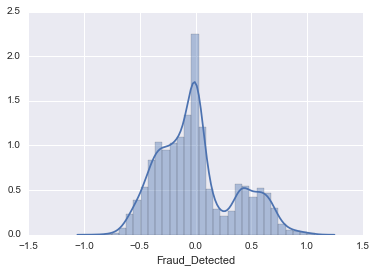

In [238]:
sns.distplot((expected-predict),bins=30)